In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline 

In [2]:
# Set file paths for Whale Returns 
whale_returns = Path('whale_returns.csv')
algo_returns =Path('algo_returns.csv')
sp_tsx_history = Path('sp_tsx_history.csv')

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns, index_col='Date',infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_values(by='Date', ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df=whale_returns_df.dropna().copy()

In [6]:
# Check all nulls have been dropped 
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns, index_col='Date',infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_values(by='Date', ascending=True) 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna().copy()

In [10]:
# Check all nulls have been dropped 
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv(sp_tsx_history, index_col='Date',infer_datetime_format=True, parse_dates=True) 
sp_tsx_history.sort_values(by='Date', ascending=True) 

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types 1, i.e. drop $ from S&P 500 closing prices 
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$", "")
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",", "")

C:\Users\Owner\AppData\Local\Temp/ipykernel_4568/2100374158.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$", "")


In [14]:
# Fix Data Types 2, i.e. convert Close column to float
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')
sp_tsx_history['Close'].dtype

dtype('float64')

In [15]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
# Count nulls in sp_tsx_daily_returns
sp_tsx_daily_returns.isnull().sum()

# Drop nulls in sp_tsx_daily_returns
sp_tsx_daily_returns=sp_tsx_daily_returns.dropna().copy()

# Confrim nulls in sp_tsx_daily_returns have been dropped 
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns = {'Close':'S&P TSX'}, inplace=True)
sp_tsx_daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns], axis='columns', join = 'outer')
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.001701
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.002563
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007137
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.002305
2012-10-09,NaN,NaN,NaN,NaN,NaN,NaN,-0.011709


In [19]:
# Drop null values and display a sample 
all_daily_returns.dropna(inplace=True)
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

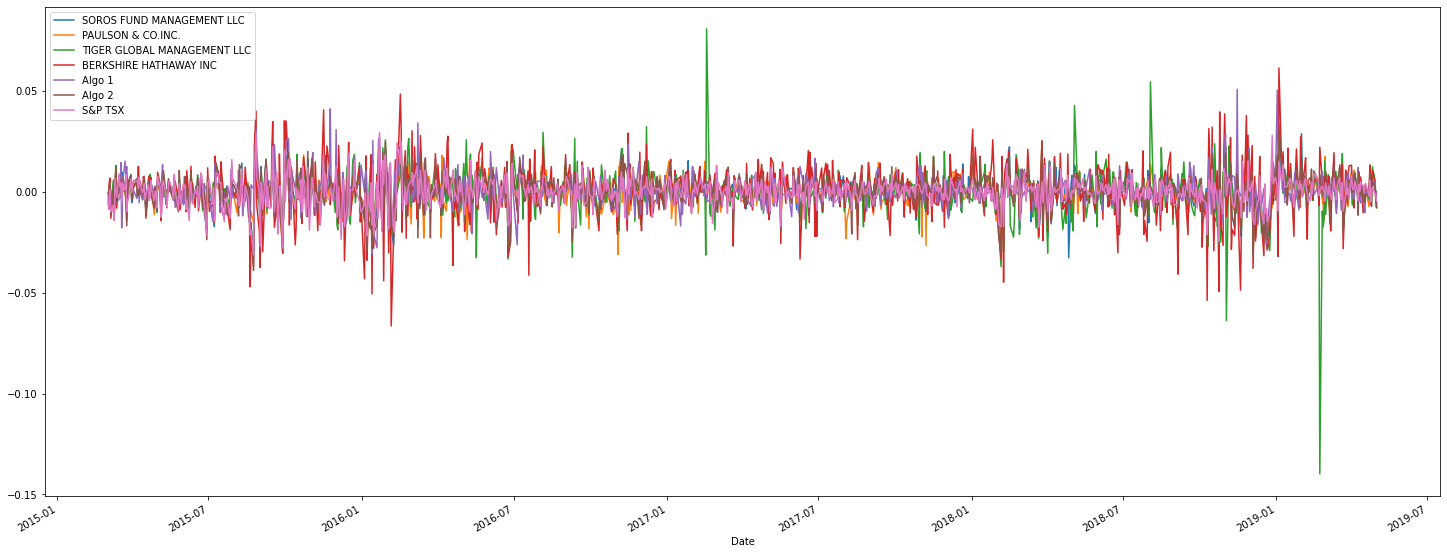

In [20]:
# Plot daily returns of all portfolios
all_daily_returns.plot(figsize=(25,10))

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ all_daily_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


Text(0, 0.5, 'Cumulative Return')

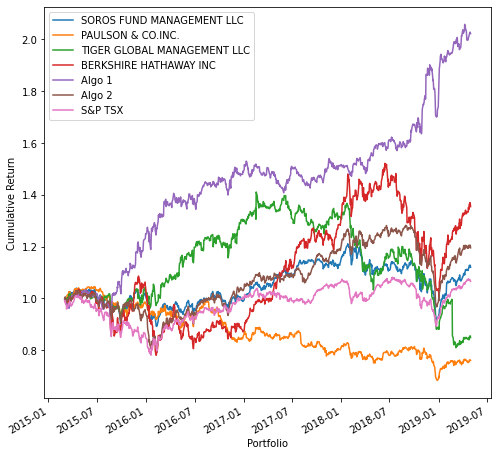

In [22]:
# Plot cumulative returns
ax = cumulative_returns.plot(figsize=(8,8))
ax.set_xlabel("Portfolio")
ax.set_ylabel("Cumulative Return")

In [23]:
# Plot cumulative returns. Does any portfolio outperform the S&P TSX60? 
print(f" Soros Fund Managament LLC, Berkshire Hathaway Inc., Algo 1 and Algo 2 all outperform the S&P TSX60 on a cumulative returns basis.") 

 Soros Fund Managament LLC, Berkshire Hathaway Inc., Algo 1 and Algo 2 all outperform the S&P TSX60 on a cumulative returns basis.


Text(0, 0.5, 'Cumulative Return')

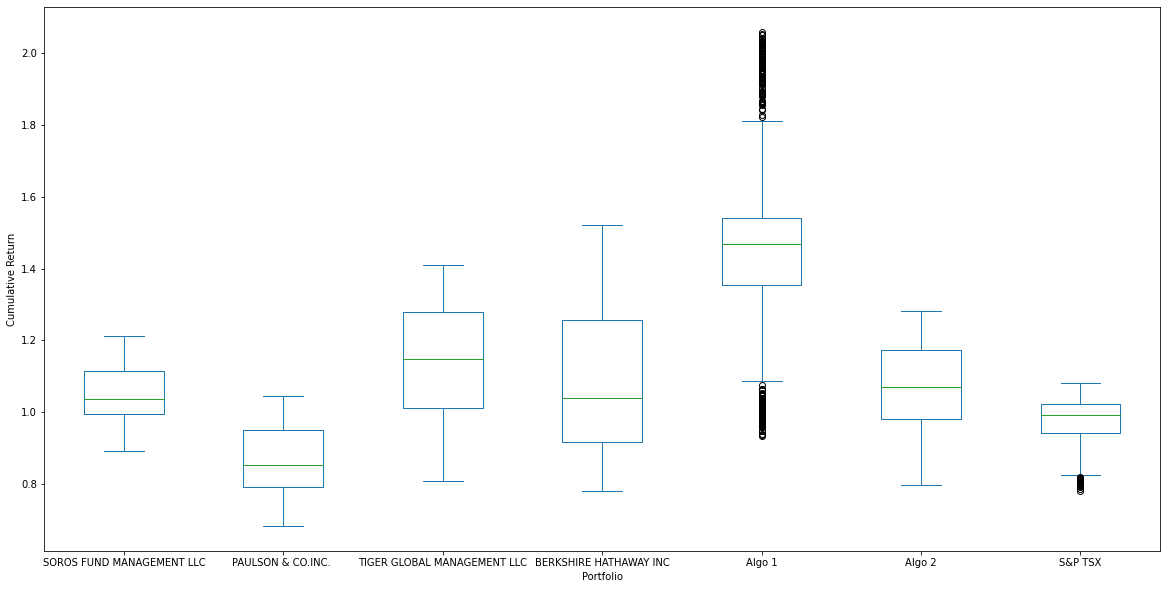

In [24]:
 # Box plot to visually show risk
ax = cumulative_returns.plot.box(figsize=(20,10))
ax.set_xlabel("Portfolio")
ax.set_ylabel("Cumulative Return")

In [25]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_daily_returns.std()
print(all_daily_returns[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2']].std())

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


In [26]:
# Calculate  the daily standard deviation of S&P TSX 60
print(all_daily_returns[['S&P TSX']].std())

# Determine which portfolios are riskier than the S&P TSX 60
if daily_std['SOROS FUND MANAGEMENT LLC'] > daily_std['S&P TSX']:
    print(f"SOROS FUND MANAGEMENT LLC is more risky than the S&P TSX 60.")
else: pass

if daily_std['PAULSON & CO.INC. '] > daily_std['S&P TSX']:
    print(f"PAULSON & CO.INC.  is more risky than the S&P TSX 60.")
else: pass


if daily_std['TIGER GLOBAL MANAGEMENT LLC'] > daily_std['S&P TSX']:
    print(f"TIGER GLOBAL MANAGEMENT LLC  is more risky than the S&P TSX 60.")
else: pass

if daily_std['BERKSHIRE HATHAWAY INC'] > daily_std['S&P TSX']:
    print(f"BERKSHIRE HATHAWAY INC  is more risky than the S&P TSX 60.")
else: pass

if daily_std['Algo 1'] > daily_std['S&P TSX']:
    print(f"Algo 1  is more risky than the S&P TSX 60.")
else: pass

if daily_std['Algo 2'] > daily_std['S&P TSX']:
    print(f"Algo 2  is more risky than the S&P TSX 60.")
else: pass

S&P TSX    0.007034
dtype: float64
SOROS FUND MANAGEMENT LLC is more risky than the S&P TSX 60.
TIGER GLOBAL MANAGEMENT LLC  is more risky than the S&P TSX 60.
BERKSHIRE HATHAWAY INC  is more risky than the S&P TSX 60.
Algo 1  is more risky than the S&P TSX 60.
Algo 2  is more risky than the S&P TSX 60.


In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

Text(0, 0.5, 'Rolling Std Deviation')

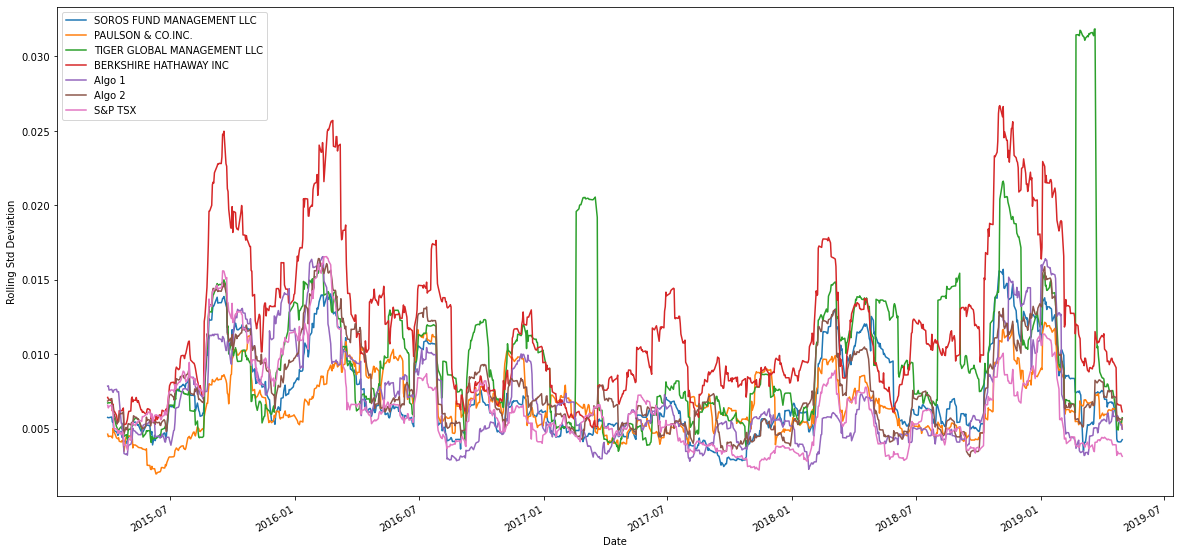

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
ax = rolling_std.plot(figsize=(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Std Deviation")

In [29]:
# Calculate the correlation
import seaborn as sns 
correlation = all_daily_returns.corr()

# Display the correlation matrix
correlation 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

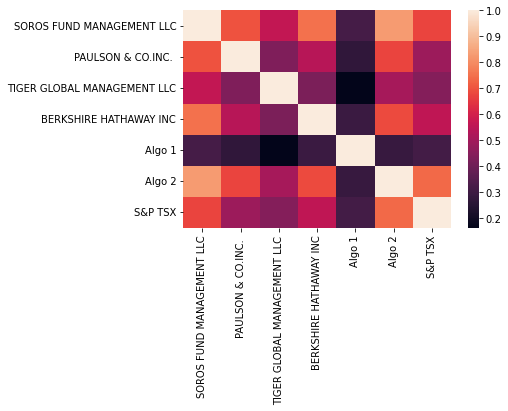

In [30]:
# Display the correlation matrix heatmap 
sns.heatmap(correlation)

In [31]:
# Calculate covariance of a single portfolio
# Select Berkshire Hathaway Inc as a portfolio 
berkshire__rolling_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_daily_returns['S&P TSX'])
berkshire__rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 1029, dtype: float64

In [32]:
# Calculate variance of S&P TSX
sp_tsx_rolling_variance= all_daily_returns['S&P TSX'].rolling(window=60).var()
sp_tsx_rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [33]:
# Computing beta of Berkshire Hathaway 
berkshire_60d_rolling_beta = berkshire__rolling_covariance/ sp_tsx_rolling_variance
berkshire_60d_rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.243097
2019-04-26    1.245349
2019-04-29    1.207654
2019-04-30    1.229613
2019-05-01    1.221931
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC 60 DAY ROLLING BETA'}, xlabel='Date'>

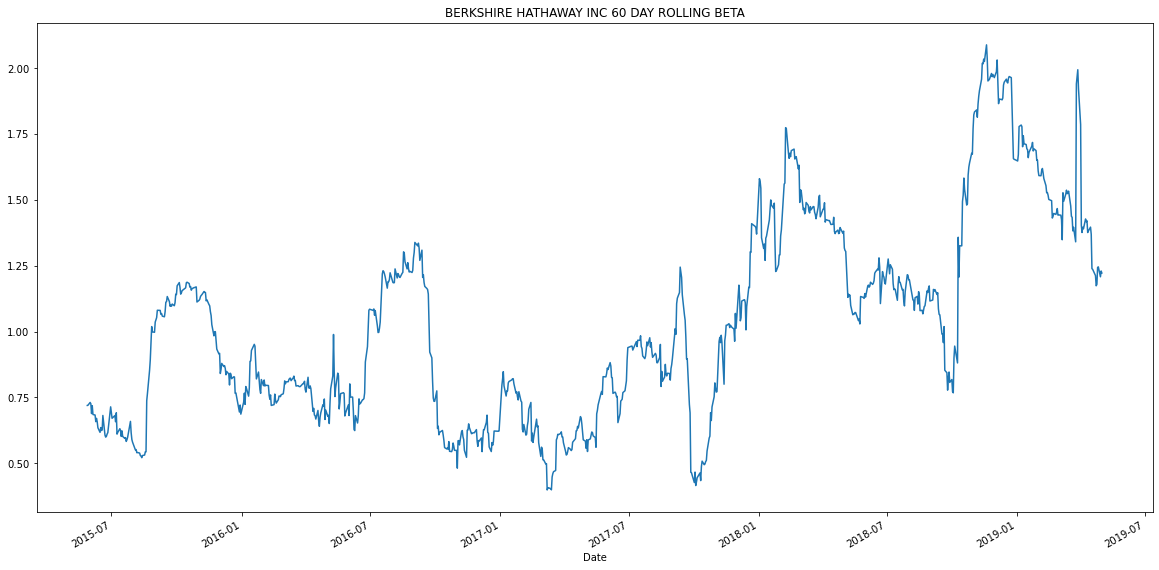

In [34]:
# Plot beta trend
berkshire_60d_rolling_beta.plot(figsize=(20, 10), title='BERKSHIRE HATHAWAY INC 60 DAY ROLLING BETA')

In [35]:
# Annualized Sharpe Ratios
# Assume risk free rate is equal to zero

# Compute Annualized Sharpe Ratios
sharpe_ratios = ((all_daily_returns.mean()) * 252) / (all_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

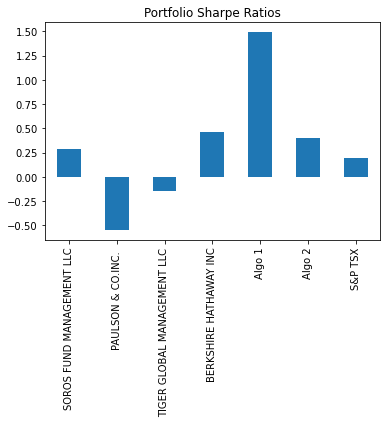

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Portfolio Sharpe Ratios')

In [37]:
# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
print(f"Both algorithmic strategies outperform the market (due to their higher Sharpe Ratios). However, only Algo 1 outperforms the market and all the whale portfolios, while Algo 2 outperforms the mnarket and all whale portfolios except Berkshire Hathaway Inc.")   

Both algorithmic strategies outperform the market (due to their higher Sharpe Ratios). However, only Algo 1 outperforms the market and all the whale portfolios, while Algo 2 outperforms the mnarket and all whale portfolios except Berkshire Hathaway Inc.


In [38]:
# Set file paths for l, otex and shop 
l_price_historical = Path('l_historical.csv')
otex_price_historical =Path('otex_historical.csv')
shop_price_historical = Path('shop_historical.csv')

In [39]:
# Reading data from 1st stock
l_price_df = pd.read_csv(l_price_historical, index_col='Date',infer_datetime_format=True, parse_dates=True)
l_price_df.sort_values(by='Date', ascending=True)
l_price_df.drop(columns =['Symbol'], inplace=True)
l_price_df.rename(columns ={'Close':'L'}, inplace=True)
l_price_df

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [40]:
# Reading data from 2nd stock
otex_price_df = pd.read_csv(otex_price_historical, index_col='Date',infer_datetime_format=True, parse_dates=True)
otex_price_df.sort_values(by='Date', ascending=True)
otex_price_df.drop(columns =['Symbol'], inplace=True)
otex_price_df.rename(columns ={'Close':'OTEX'}, inplace=True)
otex_price_df

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [41]:
# Reading data from 3rd stock
shop_price_df = pd.read_csv(shop_price_historical, index_col='Date',infer_datetime_format=True, parse_dates=True)
shop_price_df.sort_values(by='Date', ascending=True)
shop_price_df.drop(columns =['Symbol'], inplace=True)
shop_price_df.rename(columns ={'Close':'SHOP'}, inplace=True)
shop_price_df

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [42]:
# Combine all stocks in a single DataFrame
new_stocks_df = pd.concat([l_price_df, otex_price_df, shop_price_df], axis='columns', join = 'outer')
new_stocks_df

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [43]:
# Reset Date index
print(f"Previously done while reading in the csv files.")

Previously done while reading in the csv files.


In [44]:
# Calculate daily returns
new_stocks_daily_returns = new_stocks_df.pct_change()

# Drop NAs
new_stocks_daily_returns= new_stocks_daily_returns.dropna().copy()

# Display sample data
new_stocks_daily_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


In [45]:
# Check for NAs
new_stocks_daily_returns.isnull().sum()

L       0
OTEX    0
SHOP    0
dtype: int64

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]
l_weight = 1/3
otex_weight=1/3
shop_weight=1/3

# Calculate portfolio return
portfolio_returns = ((l_weight * new_stocks_daily_returns["L"]) + (otex_weight * new_stocks_daily_returns["OTEX"])+(shop_weight* new_stocks_daily_returns["SHOP"]))

# Display sample data
portfolio_returns_df = portfolio_returns.to_frame()
portfolio_returns_df.rename(columns = {0:'My Portfolio'}, inplace=True)
portfolio_returns_df

,My Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
...,...
2019-12-20,0.007495
2019-12-23,-0.006607
2019-12-24,0.006331


In [47]:
# Join your returns DataFrame to the original returns DataFrame
modified_daily_returns = pd.concat([all_daily_returns, portfolio_returns_df], axis='columns', join = 'outer')
modified_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007495
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006607
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006331


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
modified_daily_returns=modified_daily_returns.dropna().copy()
modified_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [49]:
# Confirm all NaNs have been dropped 
modified_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My Portfolio                   0
dtype: int64

In [50]:
# Calculate the annualized `std`
modified_daily_std = modified_daily_returns.std()
modified_annualized_std = modified_daily_std*np.sqrt(252)
modified_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
My Portfolio                   0.224346
dtype: float64

Text(0, 0.5, 'Rolling Std Deviation')

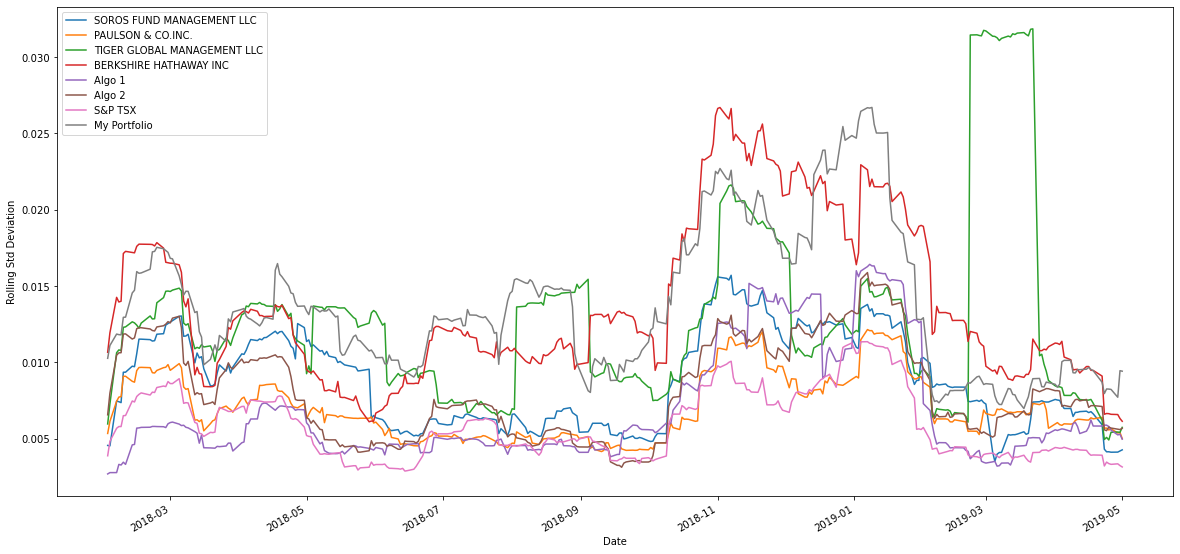

In [51]:
# Calculate rolling standard deviation
modified_rolling_std = modified_daily_returns.rolling(window=21).std()

# Plot rolling standard deviation
ax = modified_rolling_std.plot(figsize=(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Std Deviation")

In [52]:
# Calculate and plot the correlation
modified_correlation = modified_daily_returns.corr()
modified_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
My Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

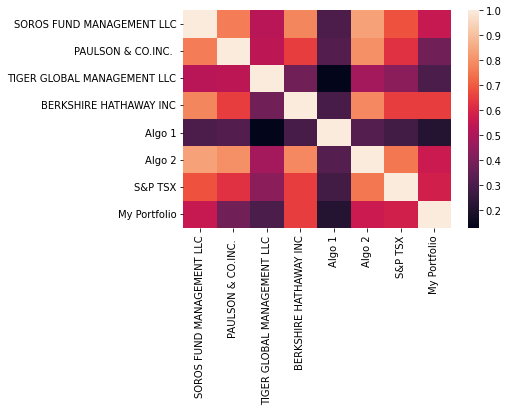

In [53]:
# Calculate and plot the modified correlation heatmap 
sns.heatmap(modified_correlation)

In [54]:
# Calculate my portfolio rolling covariance
my__rolling_covariance = modified_daily_returns['My Portfolio'].rolling(window=60).cov(modified_daily_returns['S&P TSX'])
my__rolling_covariance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000013
2019-04-26    0.000013
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000012
Length: 328, dtype: float64

In [55]:
# Calculate modified S&P TSX rolling variance
sp_tsx_modified_rolling_variance= modified_daily_returns['S&P TSX'].rolling(window=60).var()
sp_tsx_modified_rolling_variance

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 328, dtype: float64

In [56]:
# Calculate and plot Beta
my_60d_rolling_beta = my__rolling_covariance/sp_tsx_modified_rolling_variance
my_60d_rolling_beta

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.895621
2019-04-26    0.894481
2019-04-29    0.855899
2019-04-30    0.859507
2019-05-01    0.804974
Length: 328, dtype: float64

<AxesSubplot:title={'center':'My Portfolio 60 day Rolling Beta'}, xlabel='Date'>

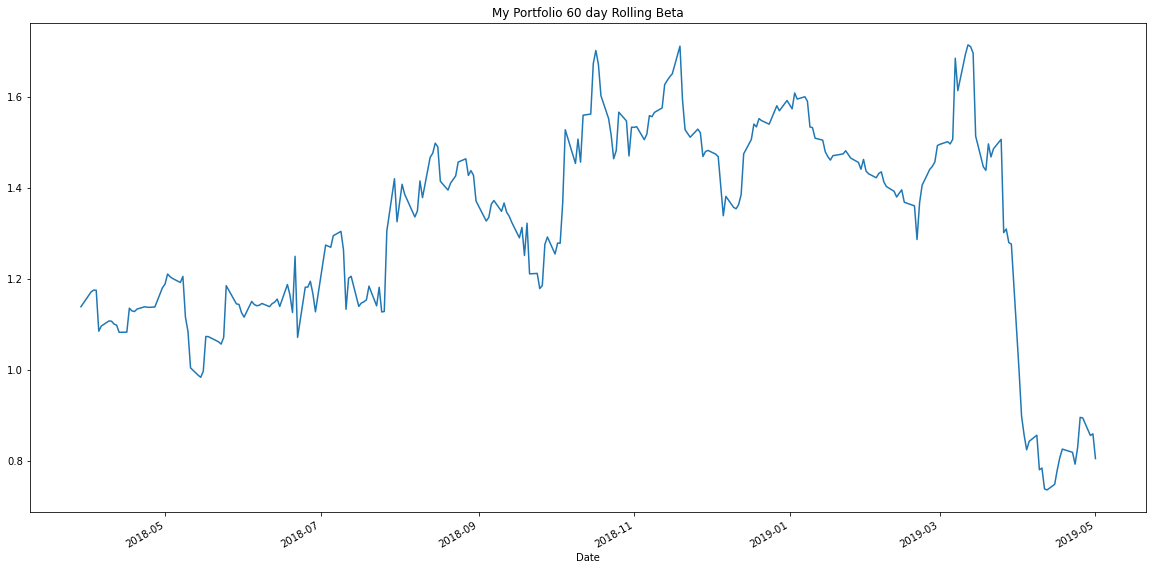

In [57]:
# Plot my portfolio rolling Beta
my_60d_rolling_beta.plot(figsize=(20, 10), title='My Portfolio 60 day Rolling Beta')

In [58]:
# Calculate Annualized Sharpe Ratios
modified_sharpe_ratios = ((modified_daily_returns.mean()) * 252) / (modified_daily_returns.std() * np.sqrt(252))
modified_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
My Portfolio                   1.564547
dtype: float64

<AxesSubplot:title={'center':'Modified Portfolio Sharpe Ratios'}>

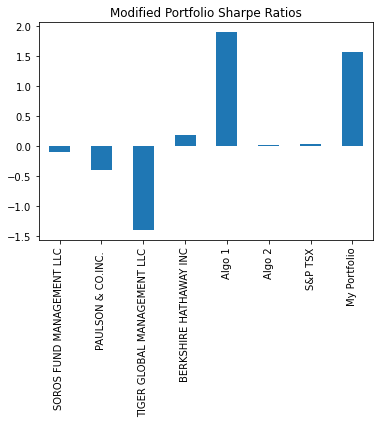

In [59]:
# Visualize the sharpe ratios as a bar plot
modified_sharpe_ratios.plot(kind='bar', title='Modified Portfolio Sharpe Ratios')

In [60]:
# How does your portfolio do?
print(f"My portfolio's Sharpe Ratio of 1.564547 outperforms Algo 2, but underperforms Algo 1. Therefore my portfiolo's re-turns to risk ratio is the second highest compared to Algo 1 and Algo 2.")

My portfolio's Sharpe Ratio of 1.564547 outperforms Algo 2, but underperforms Algo 1. Therefore my portfiolo's re-turns to risk ratio is the second highest compared to Algo 1 and Algo 2.
